In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
movie_df = pd.read_csv('movie_data.csv')

In [3]:
movie_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
movie_df.head(10)

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132 min,"Comedy, Drama, Thriller",8.60,201055038.00,11363000.00
1,tt8946378,Knives Out,PG-13,131 min,"Comedy, Crime, Drama",8.00,163700000.00,40000000.00
2,tt2584384,Jojo Rabbit,PG-13,108 min,"Comedy, Drama, War",8.00,82468705.00,14000000.00
3,tt8579674,1917,R,119 min,"Drama, War",8.40,200483309.00,100000000.00
4,tt8367814,The Gentlemen,R,113 min,"Action, Comedy, Crime",8.10,48441089.00,18400000.00
5,tt5727208,Uncut Gems,R,135 min,"Crime, Drama, Thriller",7.60,47949353.00,0.00
6,tt7131622,Once Upon a Time... in Hollywood,R,161 min,"Comedy, Drama",7.70,374251247.00,95000000.00
7,tt7286456,Joker,R,122 min,"Crime, Drama, Thriller",8.60,1073698955.00,55000000.00
8,tt1950186,Ford v Ferrari,PG-13,152 min,"Action, Biography, Drama",8.20,220803003.00,97600000.00
9,tt7975244,Jumanji: The Next Level,PG-13,123 min,"Action, Adventure, Comedy",6.80,310830000.00,125000000.00


In [5]:
movie_df['mpaa_rating'].value_counts()

R            2407
Not Rated    1963
PG-13        1152
PG            455
TV-MA         416
Unrated       281
TV-14         249
TV-PG          76
G              40
TV-G           11
NC-17           6
TV-Y7           6
M               3
TV-Y            2
Approved        1
Name: mpaa_rating, dtype: int64

In [6]:
#filling all NA's as 0 to then change series to an integer
movie_df['runtime'].fillna(0, inplace=True)

In [7]:
#cleaning runtime column to just show minutes as integer
movie_df['runtime'] = movie_df['runtime'].astype(str)

In [8]:
movie_df['runtime'] = movie_df['runtime'].apply(lambda x: x.rstrip(' min'))

In [9]:
movie_df['runtime'] = movie_df['runtime'].astype(int)

In [10]:
movie_df['star_rating'].isnull().sum()

45

In [11]:
#clean all NAs for star rating to be 0.0, data type -- float
movie_df['star_rating'].fillna(0.0, inplace=True)

In [12]:
movie_df['star_rating'] = movie_df['star_rating'].astype(float)

In [13]:
movie_df['mpaa_rating'].fillna("Not Rated", inplace=True)

In [14]:
movie_df['genre'].fillna("No Genre", inplace=True)

In [15]:
movie_df['gross_revenue'].fillna(0, inplace=True)
movie_df = movie_df[movie_df['gross_revenue'] != 0]
movie_df.head()

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132,"Comedy, Drama, Thriller",8.60,201055038.00,11363000.00
1,tt8946378,Knives Out,PG-13,131,"Comedy, Crime, Drama",8.00,163700000.00,40000000.00
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.00,82468705.00,14000000.00
3,tt8579674,1917,R,119,"Drama, War",8.40,200483309.00,100000000.00
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.10,48441089.00,18400000.00


In [16]:
movie_df['budget'].fillna(0, inplace=True)
movie_df = movie_df[movie_df['budget'] != 0]
movie_df

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132,"Comedy, Drama, Thriller",8.60,201055038.00,11363000.00
1,tt8946378,Knives Out,PG-13,131,"Comedy, Crime, Drama",8.00,163700000.00,40000000.00
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.00,82468705.00,14000000.00
3,tt8579674,1917,R,119,"Drama, War",8.40,200483309.00,100000000.00
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.10,48441089.00,18400000.00
...,...,...,...,...,...,...,...,...
9879,tt1396208,Action Replayy,Not Rated,129,"Comedy, Romance, Sci-Fi",4.20,5000000.00,10000000.00
9891,tt2357926,Ramaiya Vastavaiya,Not Rated,148,"Action, Drama, Romance",5.60,7300000.00,4600000.00
9918,tt2635622,The Attacks of 26/11,Not Rated,116,"Action, Crime, History",6.80,18000000.00,3300000.00
9927,tt1130964,The 5th Quarter,PG-13,90,"Biography, Drama, Sport",5.60,399611.00,6000000.00


In [17]:
#how many movies belong in each genre -- creating a new data frame
genre_list = []
for genres in movie_df['genre']:
    genre_list.extend(genre.strip() for genre in genres.split(','))
    genre_dict = {}
    for genre in genre_list:
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
print(genre_dict)
    

{'Comedy': 693, 'Drama': 1111, 'Thriller': 372, 'Crime': 333, 'War': 33, 'Action': 662, 'Biography': 178, 'Adventure': 460, 'History': 88, 'Horror': 224, 'Mystery': 180, 'Animation': 144, 'Romance': 286, 'Fantasy': 173, 'Sci-Fi': 165, 'Music': 54, 'Family': 107, 'Western': 10, 'Musical': 13, 'Sport': 34}


In [18]:
len(list(genre_dict.keys()))

20

In [19]:
movie_df['star_rating'].mean()

6.449092692496326

In [20]:
movie_df['star_rating'].median()

6.5

In [21]:
test = movie_df.groupby(['genre'])
test['star_rating'].mean()

genre
Action                         5.38
Action, Adventure              6.77
Action, Adventure, Biography   7.15
Action, Adventure, Comedy      6.39
Action, Adventure, Crime       6.27
                               ... 
Mystery, Thriller              7.80
Romance                        7.70
Romance, Sci-Fi, Thriller      7.00
Sci-Fi, Thriller               7.40
Thriller                       5.30
Name: star_rating, Length: 238, dtype: float64

In [22]:
# top_rated_genre_list = []
# for genres in df_highest_rated['genre']:
#     top_rated_genre_list.extend(genre.strip() for genre in genres.split(','))
#     genre_dict = {}
#     for genre in top_rated_genre_list:
#         if genre in genre_dict:
#             genre_dict[genre] += 1
#         else:
#             genre_dict[genre] = 1
# #print(genre_dict)


In [23]:
genre_df_dict = {'genre': list(genre_dict.keys()), 'count': list(genre_dict.values())}
genre_df = pd.DataFrame(genre_df_dict)
genre_df

,genre,count
0,Comedy,693
1,Drama,1111
2,Thriller,372
3,Crime,333
4,War,33
5,Action,662
6,Biography,178
7,Adventure,460
8,History,88
9,Horror,224


In [24]:
#add rating to genre_df
unique_genres = list(genre_dict.keys())
genre_rating_dict = {}
for index, row in movie_df.iterrows():
     for genre in unique_genres:
            if genre in row['genre']:
                rating = row['star_rating']
                if genre in genre_rating_dict:
                    genre_rating_dict[genre] += rating
                else:
                    genre_rating_dict[genre] = rating

genre_df['rating_sum'] = list(genre_rating_dict.values())
genre_df['rating_average'] = round(genre_df['rating_sum']/genre_df['count'], 2)
genre_df.drop(columns=['rating_sum'], inplace=True)
genre_df

,genre,count,rating_average
0,Comedy,693,6.33
1,Drama,1111,6.67
2,Thriller,372,6.30
3,Crime,333,6.50
4,War,33,6.83
5,Action,662,6.39
6,Biography,178,7.05
7,Adventure,460,6.45
8,History,88,6.89
9,Horror,224,5.90


In [25]:
#add revenue to genre_df
genre_revenue_dict = {}
for index, row in movie_df.iterrows():
    for genre in unique_genres:
        if genre in row['genre']:
            revenue = row['gross_revenue']
            if genre in genre_revenue_dict:
                genre_revenue_dict[genre] += revenue
            else:
                genre_revenue_dict[genre] = revenue
                
genre_df['revenue_sum'] = list(genre_revenue_dict.values())
genre_df['revenue_average'] = round(genre_df['revenue_sum']/genre_df['count'])
genre_df.drop(columns=['revenue_sum'], inplace=True)
genre_df

,genre,count,rating_average,revenue_average
0,Comedy,693,6.33,119642388.00
1,Drama,1111,6.67,69217944.00
2,Thriller,372,6.30,100319108.00
3,Crime,333,6.50,54944306.00
4,War,33,6.83,27614798.00
5,Action,662,6.39,207090932.00
6,Biography,178,7.05,75411057.00
7,Adventure,460,6.45,338823701.00
8,History,88,6.89,66010524.00
9,Horror,224,5.90,68107796.00


In [26]:
genre_budget_dict = {}
for index, row in movie_df.iterrows():
    for genre in unique_genres:
        if genre in row['genre']:
            budget = row['budget']
            if genre in genre_budget_dict:
                genre_budget_dict[genre] += budget
            else:
                genre_budget_dict[genre] = budget
                
genre_df['budget_sum'] = list(genre_budget_dict.values())
genre_df['budget_average'] = round(genre_df['budget_sum']/genre_df['count'])
genre_df.drop(columns=['budget_sum'], inplace=True)
genre_df

,genre,count,rating_average,revenue_average,budget_average
0,Comedy,693,6.33,119642388.00,36952735.00
1,Drama,1111,6.67,69217944.00,24068427.00
2,Thriller,372,6.30,100319108.00,27458921.00
3,Crime,333,6.50,54944306.00,25929588.00
4,War,33,6.83,27614798.00,17722164.00
5,Action,662,6.39,207090932.00,66472722.00
6,Biography,178,7.05,75411057.00,25438091.00
7,Adventure,460,6.45,338823701.00,96116025.00
8,History,88,6.89,66010524.00,28784651.00
9,Horror,224,5.90,68107796.00,15550948.00


In [27]:
genre_df.sort_values(by=['revenue_average'], ascending=False, inplace=True)
genre_df.reset_index(drop=True, inplace=True)
genre_df

,genre,count,rating_average,revenue_average,budget_average
0,Adventure,460,6.45,338823701.00,96116025.00
1,Sci-Fi,165,6.46,326686014.00,90231589.00
2,Animation,144,6.61,313909898.00,81031484.00
3,Fantasy,173,6.22,222332205.00,74396411.00
4,Family,107,6.10,214217500.00,69715675.00
5,Action,662,6.39,207090932.00,66472722.00
6,Musical,13,6.69,189202890.00,43201540.00
7,Music,54,7.91,122343843.00,26763532.00
8,Comedy,693,6.33,119642388.00,36952735.00
9,Western,10,6.75,101423712.00,42650000.00


In [28]:
#add budget to top_genre_df
# genre_budget_dict = {}
# for index, row in movie_df.iterrows():
#     for genre in genre_list:
#         if genre in row['genre']:
#             budget = row['budget']
#             if genre in genre_budget_dict:
#                 genre_budget_dict[genre] += budget
#             else:
#                 genre_budget_dict[genre] = budget
                
# genre_df['budget_sum'] = list(genre_budget_dict.values())
# genre_df['budget_average'] = genre_df['budget_sum']/genre_df['count']

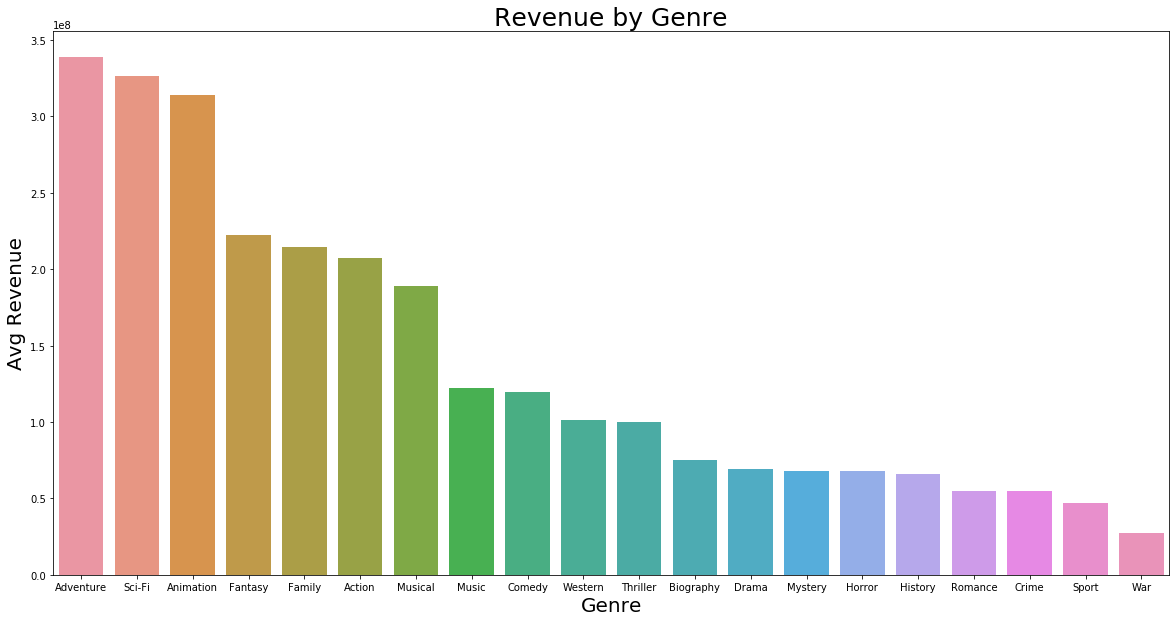

In [29]:
fig, ax1 = plt.subplots(figsize=(20,10))
sns.barplot(genre_df['genre'], genre_df['revenue_average'])
ax1.set_title('Revenue by Genre', fontsize=(25))
ax1.set_ylabel('Avg Revenue', fontsize=20)
ax1.set_xlabel("Genre", fontsize=20)
plt.show()

In [30]:
top_genres_df = genre_df.iloc[:11].copy()
top_genres_df
top_genres_list = top_genres_df['genre']
top_genres_list

0     Adventure
1        Sci-Fi
2     Animation
3       Fantasy
4        Family
5        Action
6       Musical
7         Music
8        Comedy
9       Western
10     Thriller
Name: genre, dtype: object

In [31]:
#add budget to top_genre_df
# genre_budget_dict = {}
# for index, row in movie_df.iterrows():
#     for genre in top_genres_list:
#         if genre in row['genre']:
#             budget = row['budget']
#             if genre in genre_budget_dict:
#                 genre_budget_dict[genre] += budget
#             else:
#                 genre_budget_dict[genre] = budget
                
# top_genres_df['budget_sum'] = list(genre_budget_dict.values())
# top_genres_df['budget_sum'] = round(top_genres_df['budget_sum'])
# top_genres_df['budget_average'] = round(top_genres_df['budget_sum']/top_genres_df['count'])

# top_genres_df

In [32]:
top_genres_df['profit_avg'] = top_genres_df['revenue_average'] - top_genres_df['budget_average']
top_genres_df

,genre,count,rating_average,revenue_average,budget_average,profit_avg
0,Adventure,460,6.45,338823701.00,96116025.00,242707676.00
1,Sci-Fi,165,6.46,326686014.00,90231589.00,236454425.00
2,Animation,144,6.61,313909898.00,81031484.00,232878414.00
3,Fantasy,173,6.22,222332205.00,74396411.00,147935794.00
4,Family,107,6.10,214217500.00,69715675.00,144501825.00
5,Action,662,6.39,207090932.00,66472722.00,140618210.00
6,Musical,13,6.69,189202890.00,43201540.00,146001350.00
7,Music,54,7.91,122343843.00,26763532.00,95580311.00
8,Comedy,693,6.33,119642388.00,36952735.00,82689653.00
9,Western,10,6.75,101423712.00,42650000.00,58773712.00


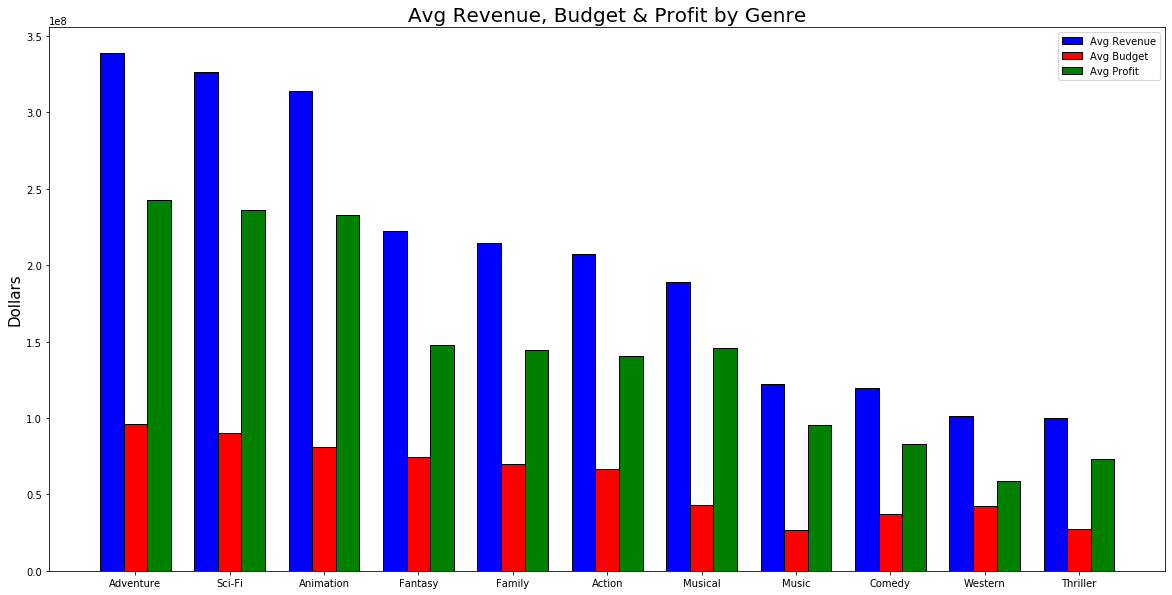

In [33]:
#Comparing our top genres - breaking down to avg revenue per movie vs avg budget and then avg profit

labels = top_genres_df['genre']
revenue = top_genres_df['revenue_average']
budget = top_genres_df['budget_average']
profit = top_genres_df['profit_avg']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
bar1 = ax.bar(x + 0.00, revenue, width, label='Avg Revenue', color='blue', edgecolor='black')
bar2 = ax.bar(x + 0.25, budget, width, label='Avg Budget', color='red', edgecolor='black')
bar3 = ax.bar(x + 0.50, profit, width, label='Avg Profit', color='green', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dollars', fontsize=15)
ax.set_title('Avg Revenue, Budget & Profit by Genre', fontsize=20)
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [34]:
#cleaning mpaa rating for anything outside of typical ratings. 'Not Rated' was given for Null values at the beginning.
mpaa_cleaned = movie_df[movie_df['mpaa_rating'].isin(['PG-13', 'PG', 'R', 'G'])]

In [35]:
mpaa_grouped = mpaa_cleaned.groupby(['mpaa_rating'])
mpaa_grouped['gross_revenue'].sum().sort_values(ascending=False)

mpaa_rating
PG-13   135944363099.00
PG       58479791297.00
R        53517974834.00
G         5779260348.00
Name: gross_revenue, dtype: float64

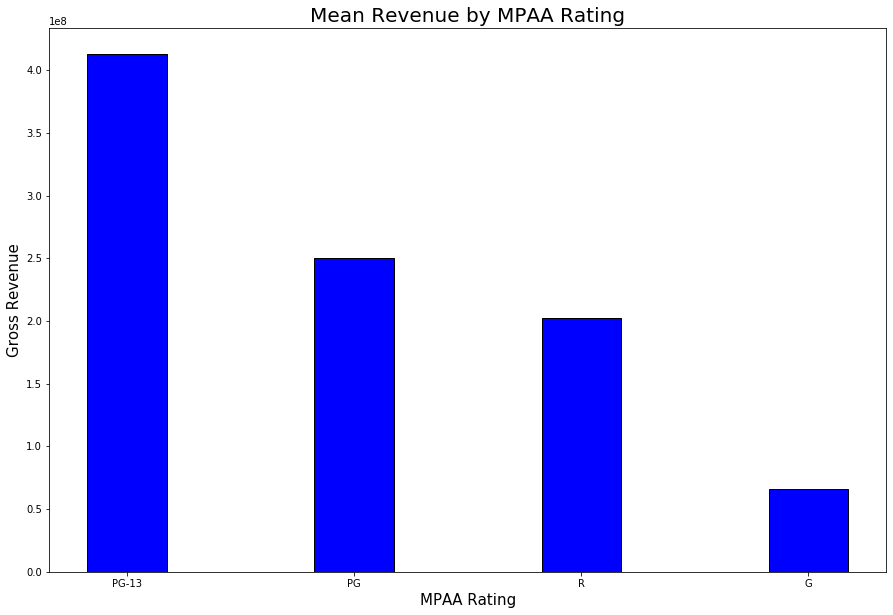

In [37]:
#Comparing the mean revenue by MPAA rating to understand what group drives the most sales
#Confirming that PG-13 drives the most in revenue on average which makes sense since appeals more universally than R or PG.

labels = ['PG-13', 'PG', 'R', 'G']
revenue = mpaa_grouped['gross_revenue'].mean().sort_values(ascending=False)

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x, revenue, width, color='blue', edgecolor='black')

ax.set_xlabel('MPAA Rating', fontsize=15)
ax.set_ylabel('Gross Revenue', fontsize=15)
ax.set_title('Mean Revenue by MPAA Rating', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

In [40]:
#setting the stage for how much you can expect to spend on average

In [41]:
movie_df['budget'].mean()

40240169.3521334

In [72]:
#dropped outliers to show average expected spend on a project
movie_df['budget'].median()

cleaned_budget = movie_df[(movie_df['budget'] <= movie_df['budget'].median()*2)]
cleaned_budget = cleaned_budget[(cleaned_budget['budget'] >= cleaned_budget['budget'].median()*.25)]

Text(0.5, 22.199999999999996, 'Budget in Millions')

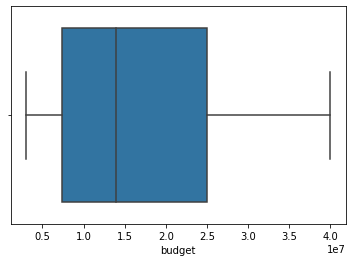

In [77]:
sns.boxplot(x=cleaned_budget['budget'], )

ax.set_xlabel('Budget in Millions')

In [80]:
cleaned_budget['budget'].median()

14000000.0